In [1]:
from sklearn.datasets import load_wine
from sklearn import neighbors
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import KFold
from sklearn.model_selection import ParameterGrid
from sklearn import svm
import numpy as np

RANDOM_STATE = 42
FIG_SIZE = (10, 7)

# 1. Load Wine dataset (scikit library)

In [2]:
data = load_wine()
len(data.data)

178

## 2. Select the first two attributes for a 2D representation of the image

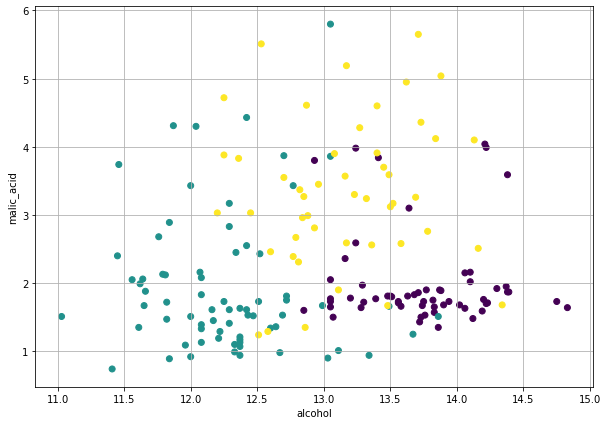

In [3]:
X = data.data[:,:2]

fig, ax = plt.subplots(figsize=FIG_SIZE)

ax.scatter(X[:,0],X[:,1],c=data.target)

ax.set_title('')
ax.set_xlabel('alcohol')
ax.set_ylabel('malic_acid')
ax.grid()

plt.show()

## 3. Randomly split data intro train, validation and test sets in proportion 5:2:3

In [4]:
y = data.target
# train 0.5
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.5, stratify=y)
# val 2/5 and test 3/5
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.6, stratify=y_test)

## 4. For k=[1,3,5,7]
a. Apply K-Nearest Neightbors \
b. plot the data and the decision boundaries \
c. Evalueate the method on the validation set

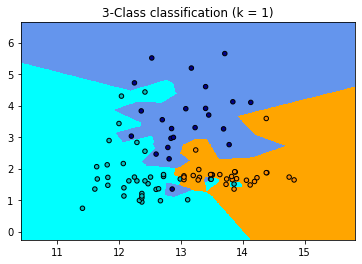

The method on the validation set
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.83      0.71      0.77        14
           2       0.42      0.56      0.48         9

    accuracy                           0.66        35
   macro avg       0.66      0.65      0.65        35
weighted avg       0.69      0.66      0.67        35



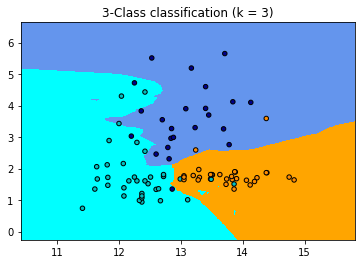

The method on the validation set
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.85      0.79      0.81        14
           2       0.50      0.67      0.57         9

    accuracy                           0.74        35
   macro avg       0.75      0.73      0.73        35
weighted avg       0.78      0.74      0.75        35



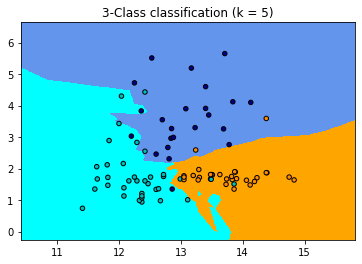

The method on the validation set
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.85      0.79      0.81        14
           2       0.46      0.67      0.55         9

    accuracy                           0.71        35
   macro avg       0.73      0.71      0.71        35
weighted avg       0.76      0.71      0.73        35



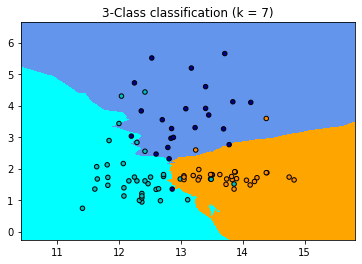

The method on the validation set
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.91      0.71      0.80        14
           2       0.50      0.78      0.61         9

    accuracy                           0.74        35
   macro avg       0.77      0.75      0.74        35
weighted avg       0.80      0.74      0.76        35



In [5]:
accurancy = []
k = [1,3,5,7]

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
h = .01

x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for n_neighbors in k:
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(x_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.title("3-Class classification (k = %i)"
              % (n_neighbors))
    plt.show()
    
    print('The method on the validation set')
    y_val_pred = clf.predict(x_val)
    accurancy.append(accuracy_score(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))
    

## 5. Plot a graph showing how the accurancy on the validation set varies when changing K

Text(0, 0.5, 'accurancy')

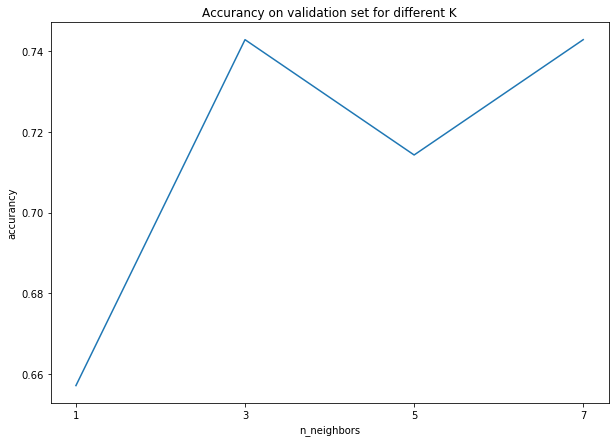

In [6]:
K = ['1','3','5','7']

plt.figure(figsize=FIG_SIZE)
plt.plot(K,accurancy)

plt.title("Accurancy on validation set for different K")
plt.xlabel("n_neighbors")
plt.ylabel("accurancy")

## 7. Use the best value of K and evaluate the model on the test set

In [7]:
best_k = k[accurancy.index(max(accurancy))]

clf = neighbors.KNeighborsClassifier(best_k)
clf.fit(x_train, y_train)

print(f'The method with k = %i on the test set'%best_k)
y_val_pred = clf.predict(x_test)
print(classification_report(y_test, y_val_pred))


The method with k = 3 on the test set
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.89      0.81      0.85        21
           2       0.69      0.73      0.71        15

    accuracy                           0.78        54
   macro avg       0.77      0.77      0.77        54
weighted avg       0.78      0.78      0.78        54



# Linear SVM

## 8. For C = [0.001, 0.01, 0.1, 1, 10, 100,1000]:
a. Train a linear SVM on the training set \
b. Plot the data and the decision boundaries \
c. Evaluate the method on the validation set 

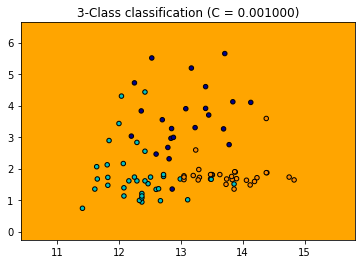

The method on the validation set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.40      1.00      0.57        14
           2       0.00      0.00      0.00         9

    accuracy                           0.40        35
   macro avg       0.13      0.33      0.19        35
weighted avg       0.16      0.40      0.23        35



c:\users\simone\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


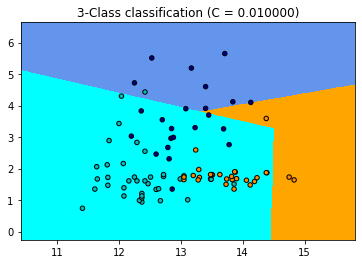

The method on the validation set
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        12
           1       0.42      0.93      0.58        14
           2       0.33      0.11      0.17         9

    accuracy                           0.43        35
   macro avg       0.58      0.37      0.30        35
weighted avg       0.60      0.43      0.33        35



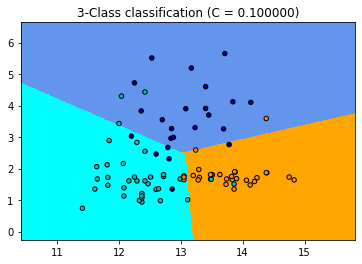

The method on the validation set
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.71      0.80        14
           2       0.46      0.67      0.55         9

    accuracy                           0.71        35
   macro avg       0.73      0.71      0.71        35
weighted avg       0.76      0.71      0.73        35



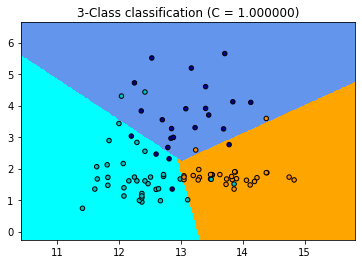

The method on the validation set
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.92      0.79      0.85        14
           2       0.50      0.67      0.57         9

    accuracy                           0.74        35
   macro avg       0.74      0.73      0.73        35
weighted avg       0.78      0.74      0.75        35



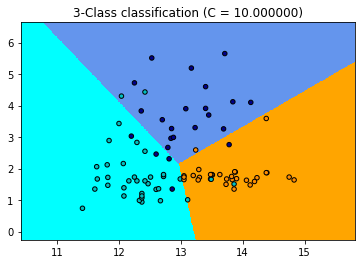

The method on the validation set
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.92      0.79      0.85        14
           2       0.50      0.67      0.57         9

    accuracy                           0.74        35
   macro avg       0.74      0.73      0.73        35
weighted avg       0.78      0.74      0.75        35



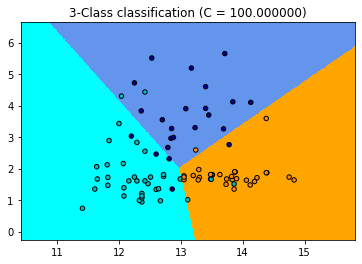

The method on the validation set
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.92      0.79      0.85        14
           2       0.46      0.67      0.55         9

    accuracy                           0.71        35
   macro avg       0.73      0.71      0.71        35
weighted avg       0.76      0.71      0.73        35



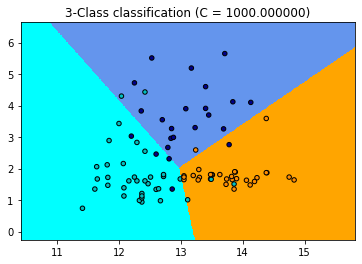

The method on the validation set
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.92      0.79      0.85        14
           2       0.46      0.67      0.55         9

    accuracy                           0.71        35
   macro avg       0.73      0.71      0.71        35
weighted avg       0.76      0.71      0.73        35



In [8]:
C = [0.001, 0.01, 0.1, 1, 10, 100,1000]
accurancy = []

for c in C:
    clf = svm.SVC(kernel='linear',C=c)
    clf.fit(x_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.title("3-Class classification (C = %f)"
              % (c))
    plt.show()
    
    print('The method on the validation set')
    y_val_pred = clf.predict(x_val)
    accurancy.append(accuracy_score(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))


## 9. Plot a graph showing how the accuracy on the validation set varies when changing C

Text(0, 0.5, 'accurancy')

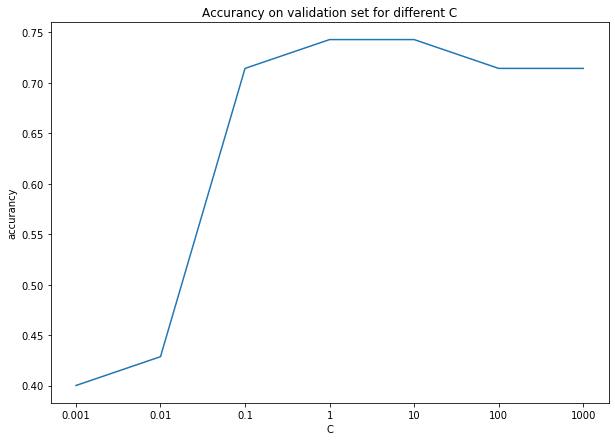

In [9]:
c = ['0.001', '0.01', '0.1', '1', '10', '100','1000']

plt.figure(figsize=FIG_SIZE)
plt.plot(c,accurancy)

plt.title("Accurancy on validation set for different C")
plt.xlabel("C")
plt.ylabel("accurancy")

## 11. Use the best value of C and evaluate the model on the test set

In [10]:
best_c = C[accurancy.index(max(accurancy))]

clf = svm.SVC(kernel='linear',C=best_c)
clf.fit(x_train, y_train)

print(f'The method with C = %f on the test set'%best_c)
y_test_pred = clf.predict(x_test)
print(classification_report(y_test, y_test_pred))

The method with C = 1.000000 on the test set
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.85      0.81      0.83        21
           2       0.67      0.67      0.67        15

    accuracy                           0.76        54
   macro avg       0.75      0.75      0.75        54
weighted avg       0.76      0.76      0.76        54



# RBF Kernel

## 12. (8.) For C = [0.001, 0.01, 0.1, 1, 10, 100,1000]:
a. Train a linear SVM on the training set \
b. Plot the data and the decision boundaries \
c. Evaluate the method on the validation set 

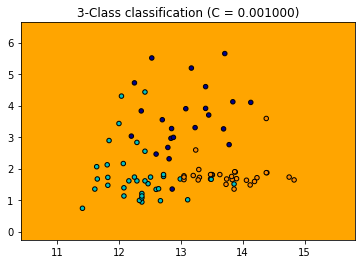

The method on the validation set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.40      1.00      0.57        14
           2       0.00      0.00      0.00         9

    accuracy                           0.40        35
   macro avg       0.13      0.33      0.19        35
weighted avg       0.16      0.40      0.23        35



c:\users\simone\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


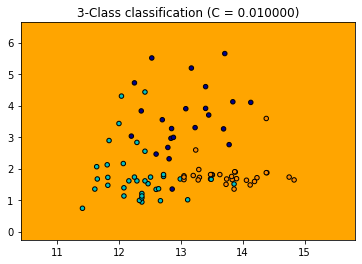

The method on the validation set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.40      1.00      0.57        14
           2       0.00      0.00      0.00         9

    accuracy                           0.40        35
   macro avg       0.13      0.33      0.19        35
weighted avg       0.16      0.40      0.23        35



c:\users\simone\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


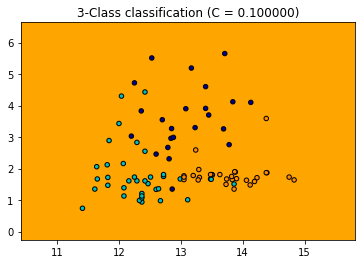

The method on the validation set
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.40      1.00      0.57        14
           2       0.00      0.00      0.00         9

    accuracy                           0.40        35
   macro avg       0.13      0.33      0.19        35
weighted avg       0.16      0.40      0.23        35



c:\users\simone\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


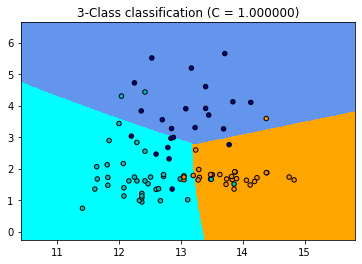

The method on the validation set
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.79      0.79      0.79        14
           2       0.45      0.56      0.50         9

    accuracy                           0.69        35
   macro avg       0.68      0.67      0.67        35
weighted avg       0.71      0.69      0.69        35



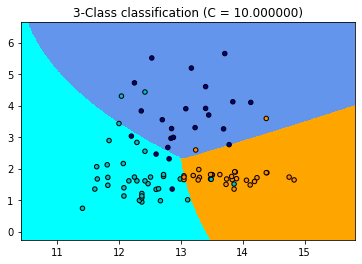

The method on the validation set
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.91      0.71      0.80        14
           2       0.50      0.78      0.61         9

    accuracy                           0.74        35
   macro avg       0.77      0.75      0.74        35
weighted avg       0.80      0.74      0.76        35



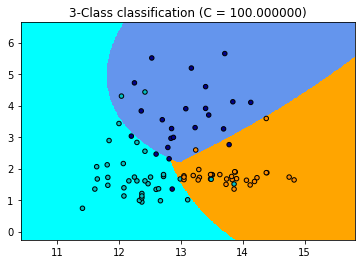

The method on the validation set
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.71      0.80        14
           2       0.46      0.67      0.55         9

    accuracy                           0.71        35
   macro avg       0.73      0.71      0.71        35
weighted avg       0.76      0.71      0.73        35



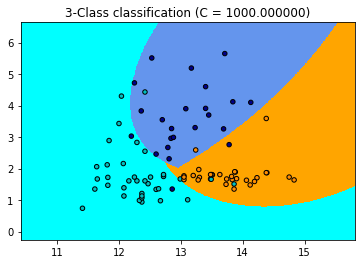

The method on the validation set
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.91      0.71      0.80        14
           2       0.47      0.78      0.58         9

    accuracy                           0.71        35
   macro avg       0.75      0.72      0.72        35
weighted avg       0.79      0.71      0.73        35



In [11]:
accurancy = []

for c in C:
    clf = svm.SVC(kernel='rbf',C=c, max_iter=10000)
    clf.fit(x_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.title("3-Class classification (C = %f)"
              % (c))
    plt.show()
    
    print('The method on the validation set')
    y_val_pred = clf.predict(x_val)
    accurancy.append(accuracy_score(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))

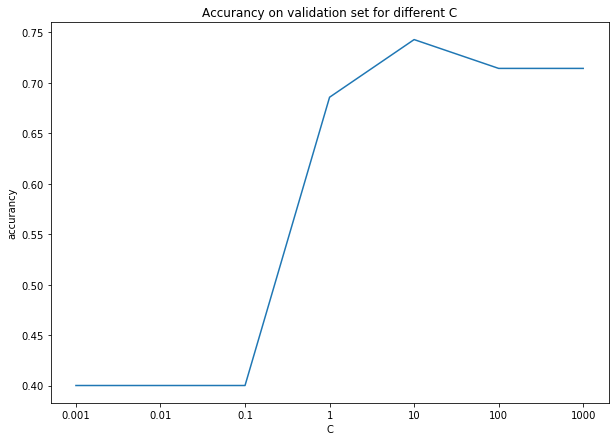

In [12]:
# Plot a graph showing how the accuracy on the validation set varies when changing C
c = ['0.001', '0.01', '0.1', '1', '10', '100','1000']

plt.figure(figsize=FIG_SIZE)
plt.plot(c,accurancy)

plt.title("Accurancy on validation set for different C")
plt.xlabel("C")
plt.ylabel("accurancy")

plt.show()

## 13. Evaluate the best C on the test set

In [13]:
# take the best C
best_c = C[accurancy.index(max(accurancy))]

clf = svm.SVC(kernel='rbf',C=best_c)
clf.fit(x_train, y_train)

print(f'The method with C = %f on the test set'%best_c)
y_test_pred = clf.predict(x_test)
print(classification_report(y_test, y_test_pred))

The method with C = 10.000000 on the test set
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        18
           1       0.81      0.81      0.81        21
           2       0.67      0.67      0.67        15

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



## 15. Perform a grid search of the best parameters for an RBF kernel: we will now tune both gamma and C at the same time. Select an appropriate range for both parameters. Train the model and score it on the validation set. Evaluate the best parameters on the test set. Plot the decision boundaries.

In [14]:
accuracies = []
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100,1000], 
            'gamma':['scale','auto', 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]}

for config in ParameterGrid(parameters):
    # train the model 
    clf = svm.SVC(kernel='rbf',**config)
    clf.fit(x_train, y_train)
    
    #score on the validation set
    accuracies.append(accuracy_score(y_val, clf.predict(x_val)))

best_config = list(ParameterGrid(parameters))[np.argmax(accuracies)]

In [16]:
# score on the validation set
clf = svm.SVC(kernel='rbf',**best_config)
clf.fit(x_train, y_train)

y_val_pred = clf.predict(x_val)
print(f'The method with %s on the validation set'%best_config)
print(classification_report(y_val, y_val_pred))

The method with {'C': 0.1, 'gamma': 1.0} on the validation set
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.91      0.71      0.80        14
           2       0.50      0.78      0.61         9

    accuracy                           0.74        35
   macro avg       0.77      0.75      0.74        35
weighted avg       0.80      0.74      0.76        35



In [17]:
# Evaluate the best parameters on the test set. 
print(f'The method with %s on the test set'%best_config)
y_test_pred = clf.predict(x_test)
print(classification_report(y_test, y_test_pred))

The method with {'C': 0.1, 'gamma': 1.0} on the test set
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        18
           1       0.83      0.90      0.86        21
           2       0.71      0.67      0.69        15

    accuracy                           0.78        54
   macro avg       0.77      0.76      0.77        54
weighted avg       0.77      0.78      0.78        54



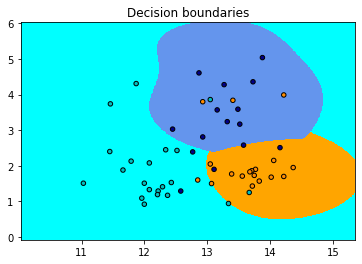

In [18]:
# Plot the decision boundaries.
x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.title("Decision boundaries")
plt.show()

## 16. Merge the training and validation split. You should now have 70% training and 30% test data.

In [19]:
x_train = np.concatenate((x_train,x_val))
y_train = np.concatenate((y_train,y_val))

## 17. Repeat the grid search for gamma and C but this time perform 5-fold validation.

In [20]:
kf = KFold(5)
accuracies = []

for config in ParameterGrid(parameters):
    clf_accuracies = []
    counts = []
    
    for train_indices, valid_indices in kf.split(x_train):
        X_train_fold = x_train[train_indices]
        y_train_fold = y_train[train_indices]
        X_valid_fold = x_train[valid_indices]
        y_valid_fold = y_train[valid_indices]
        
        # keep track of the number of elements in each split
        counts.append(len(train_indices))
        svm.SVC(kernel='rbf',**config)
        clf.fit(X_train_fold, y_train_fold)
        
        acc = accuracy_score(y_valid_fold, clf.predict(X_valid_fold))
        clf_accuracies.append(acc)
        
    accuracies.append(np.average(clf_accuracies, weights=counts))
    
best_config = list(ParameterGrid(parameters))[np.argmax(accuracies)]

In [21]:
# Evaluate the best parameters on the test set. 
print(f'The method with %s on the test set'%best_config)

svm.SVC(kernel='rbf',**best_config)
clf.fit(x_train, y_train)
y_test_pred = clf.predict(x_test)

print(classification_report(y_test, y_test_pred))

The method with {'C': 0.001, 'gamma': 'scale'} on the test set
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        18
           1       0.83      0.90      0.86        21
           2       0.73      0.73      0.73        15

    accuracy                           0.80        54
   macro avg       0.79      0.79      0.79        54
weighted avg       0.80      0.80      0.79        54



# 20. Try also with different pairs of attributes 

In [70]:
best_acc = []

for k in range(13):
    for r in range(13):
        accuracies = []
        
        if k!=r:
            X = data.data[:,[k,r]]
            y = data.target
            # train 0.5
            x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.3, stratify=y)

            for config in ParameterGrid(parameters):
                # train the model 
                clf = svm.SVC(kernel='rbf',**config)
                clf.fit(x_train, y_train)

                #score on the validation set
                accuracies.append(accuracy_score(y_test, clf.predict(x_test)))

            best_acc.append([data.feature_names[k],data.feature_names[r],np.max(accuracies)])

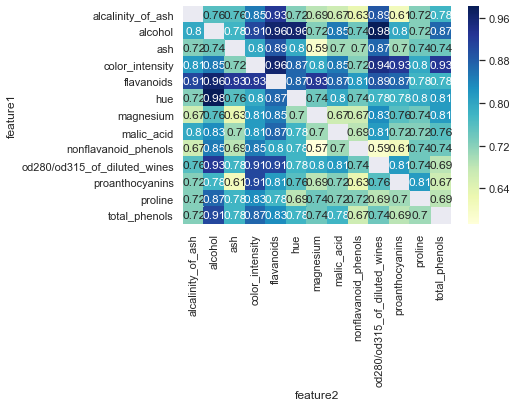

In [71]:
import seaborn as sns
import pandas as pd
dataframe = pd.DataFrame(best_acc, columns=['feature1','feature2','acc']) 
dataframe = dataframe.pivot("feature1", "feature2", "acc")
ax = sns.heatmap(dataframe, annot=True,cmap="YlGnBu")